# **Tokopedia Mobile App Reviews Sentiment Analysis & Topic Modeling**

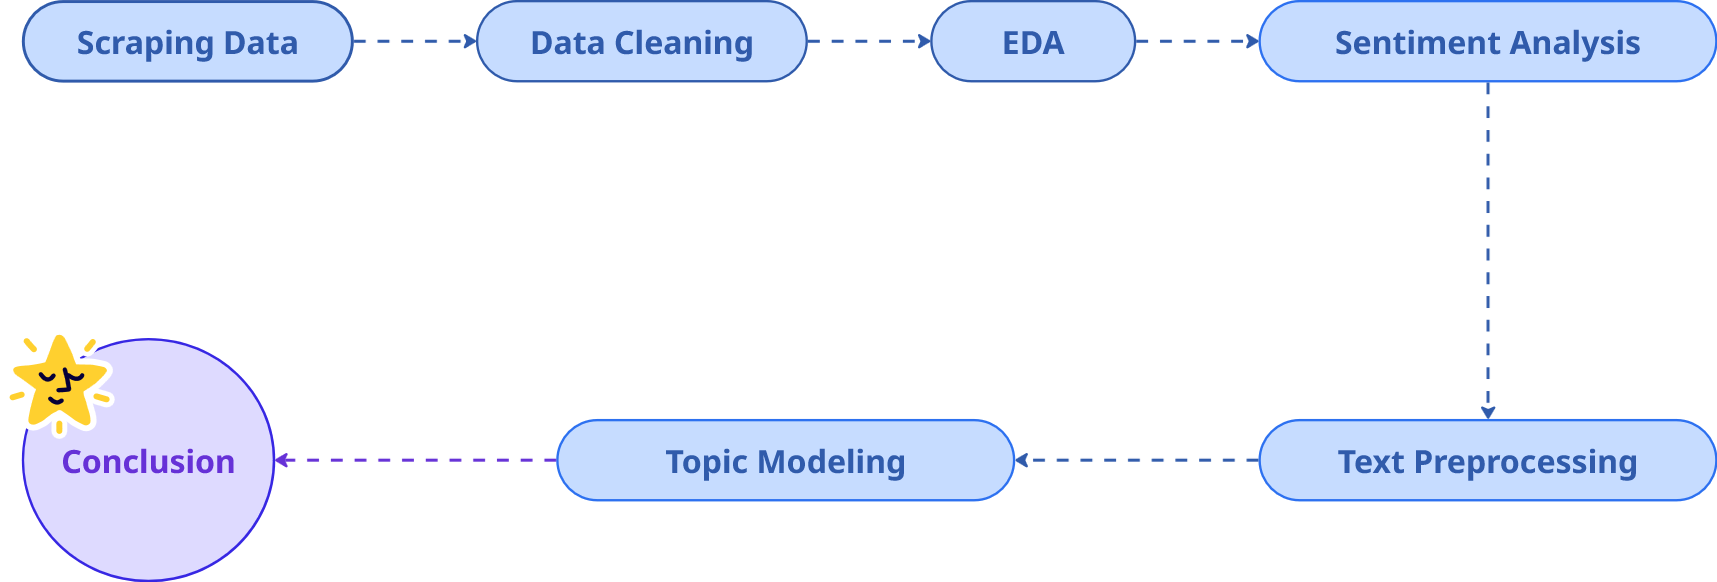

## Objective

- 1
- 2
- 3

## Outline

- Scraping Data : Collecting data from google play store website
- Data Cleaning : Fixing messy data like removing duplicates, handling missing values, or correcting errors.
- EDA : Taking a first look at the data with charts and stats to understand patterns and problems.
- Sentiment Analysis : Finding out if people’s opinions in the text are positive, negative, or neutral.
- Text Preprocessing : Preparing text or numbers for analysis, such as tokenizing words, normalizing, or scaling values.
- Topic Modeling : Discovering the main themes or topics that appear in a large collection of text.
- Conclusion : Summarizing the findings and insights from all the steps to answer the main question.

---

# 🚨 Install & Import Library

## Install Library

In [1]:
#google play scraper : Used to collect app data and user reviews directly from Google Play Store.
!pip install google-play-scraper

In [2]:
# Creates visual word clouds to highlight the most frequent words in text data.
!pip install wordcloud
# Adds a simple progress bar to loops, so you can see how long a process takes.
!pip install tqdm
# A toolkit for natural language processing, like tokenizing, stemming, or removing stopwords.
!pip install nltk
# Provides powerful pre-trained models for tasks such as text classification, sentiment analysis, and translation.
!pip install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 539.2/539.2 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.0/802.0 kB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [nltk]1/2 [nltk]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.5/561.5 kB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [transformers] [transformers]ub]


In [3]:
# to discover and understand hidden topics in documents or user reviews without manually reading them one by one
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 93.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 93.2 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.40-cp312-cp312-linux_x86_64.whl size=847019 sha256=d5aefbe131bb15c8c120c8ac01bcb9993b83bba6b58213717b5efedb696cb4c4
  Stored in directory: /home/jovyan/.cache/pip/wheels/80/e7/bb/173ca0d8ce12718c4b5e6e01619c99653579b56969b97604b2
Successfully built hdbscan
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [bertopic]4/6 [sentence-transformers]


## Import Library

In [4]:
# Import library for play store reviews scraping
from google_play_scraper import Sort, reviews
import pandas as pd

In [5]:
# Import library for visualize data
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Import library for teks processing & model inference
import re
import string
from tqdm import tqdm
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from transformers import pipeline
tqdm.pandas()
import asyncio
import time
import transformers
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt_tab to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...


In [7]:
# Import library for topic modeling
from bertopic import BERTopic
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer
from bertopic.representation import MaximalMarginalRelevance
from umap import UMAP

---

# 🗃️ Scraping Data

Scrape user reviews of the GoPay application from the Google Play Store and save the scraped data into a CSV file.

In [8]:
result = reviews(
    'com.tokopedia.tkpd', # Id gopay mobile app in play store
    lang='id', # languege code reviews
    country='id', # country code reviews
    sort=Sort.MOST_RELEVANT, # filtering method reviews
    count=100000 # count of data reviews
)

In [9]:
result = pd.DataFrame(result[0]) # Convert data scraping into table dataframe
result.info() # To show feature, count & type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              100000 non-null  object        
 1   userName              100000 non-null  object        
 2   userImage             100000 non-null  object        
 3   content               100000 non-null  object        
 4   score                 100000 non-null  int64         
 5   thumbsUpCount         100000 non-null  int64         
 6   reviewCreatedVersion  69649 non-null   object        
 7   at                    100000 non-null  datetime64[ns]
 8   replyContent          48817 non-null   object        
 9   repliedAt             48817 non-null   datetime64[ns]
 10  appVersion            69649 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 8.4+ MB


- Jumlah baris data yang didapat bervariasi antara 4000 - 100000 baris artinya terdapat baris yang kosong.
- Data memiliki sekitar 11 kolom/ feature, namun jika dilihat berdasarkan nama kolomnya akan ada beberapa kolom yang akan dihapus karena tidak memiliki nilai yang berarti.


In [10]:
result.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,91ae7188-99cd-4ac0-8ce3-fc01cc7b371b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tolong ditindak dan bila perlu dibanned tutup ...,2,9,3.327.0,2025-08-30 10:55:50,None,NaT,3.327.0
1,b3d61473-6ac2-4897-a583-6de199e21b51,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tokopedia cuma pas awal pesan barang aja yg on...,1,15,3.327.0,2025-08-29 14:10:47,None,NaT,3.327.0
2,e3ad9554-2391-48bf-9510-4f0163064002,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Udah hampir bagus sih, tapi ada masalah dari e...",2,0,3.326.0,2025-08-31 07:18:47,"Halo Toppers, terima kasih atas rating yang ka...",2024-08-18 22:00:24,3.326.0
3,66307246-82d2-4f3d-8ef7-8825071ad7c5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"banyak penipunya, uang pembayaran saya tertaha...",1,53,3.326.0,2025-08-26 13:01:54,None,NaT,3.326.0
4,77c6c053-8716-4584-b4d5-10db294e36d8,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,saya sarankan tidak usah pakai tokped. aplikas...,1,20,3.327.0,2025-08-29 15:11:10,None,NaT,3.327.0


- reviewId: ID unik untuk setiap ulasan.
- userName: Nama pengguna yang memberikan ulasan.
- userImage: URL atau link gambar profil pengguna.
- content: Isi teks ulasan yang ditulis pengguna.
- score: Rating yang diberikan pengguna.
- thumbsUpCount: Jumlah “like” atau tanda suka pada ulasan.
- reviewCreatedVersion: Versi aplikasi saat ulasan dibuat.
- at: Tanggal dan waktu ulasan dipublikasikan.
- replyContent: Isi balasan dari pengembang terhadap ulasan (jika ada).
- repliedAt: Tanggal dan waktu balasan diberikan.
- appVersion: Versi aplikasi saat data ulasan diambil atau terakhir diketahui.

In [11]:
data = result.to_csv('result.csv', index=False) # Save dataframe as csv file

---

# 🧼 Data Cleaning

This step is about cleaning the raw scraped data to make it ready for the next stages, such as handling duplicates, missing values, or incorrect data types.

## Delete Missing & Duplicate Rows

In [12]:
# Load csv file
data = pd.read_csv('result.csv')
# Remove feature not have insight
data = data.drop(['reviewId','userName', 'userImage', 'reviewCreatedVersion', 'replyContent', 'repliedAt'],axis=1)

- Data yang sudah disimpan dalam format csv kemudian di load dan dimasukan dalam variabel data.
- Dalam data terdapat beberapa kolom yang tidak memiliki nilai yang berarti maka dihapus untuk penyederhanaan data, diataranya adalah kolom 'reviewId', 'userName', 'userImage',  'reviewCreatedVersion', 'replyContent' & 'repliedAt'.

In [13]:
data = data.drop_duplicates() # remove duplicated rows
data = data.dropna() # remove missing rows

data.info() # show results

<class 'pandas.core.frame.DataFrame'>
Index: 69649 entries, 0 to 99998
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        69649 non-null  object
 1   score          69649 non-null  int64 
 2   thumbsUpCount  69649 non-null  int64 
 3   at             69649 non-null  object
 4   appVersion     69649 non-null  object
dtypes: int64(2), object(3)
memory usage: 3.2+ MB


In [14]:
data.head(1)

,content,score,thumbsUpCount,at,appVersion
0,Tolong ditindak dan bila perlu dibanned tutup ...,2,9,2025-08-30 10:55:50,3.327.0


- Jumlah baris data pada setiap kolom atau feature sekarang sudah seragam yaitu 49878 baris, artinya sudah tidak ada lagi data kosong ataupun duplikat.
- Pada kolom at menunjukan bahwa data merupakan tanggal dan waktu ulasan di posting oleh pengguna, namun karena hanya diperluka data bulan ditahun 2025 saja maka akan dilakukan filtering.
- Pada kolom app version menunjukan nilai versi aplikasi, namun versi aplikasi terasa sangat kompleks jadi perlu dilakukan penyederhanaan agar mudah untuk dilakukan analisis.

## Data Transformation

### Month

In [15]:
data['at'] = pd.to_datetime(data['at']) # Convert feature at type to datetime type
data = data[data['at'].dt.year == 2025] # Extract data only in 2025

data['month'] = data['at'].dt.month.astype('str') # Extract mont feature & make it string type
data = data[data['month'].isin(['6', '7', '8'])] # Filtering data in motnh 6, 7 & 8
data = data.drop(columns=['at'], axis=1) # Deleted at feature
data['month'].unique()

array(['8', '7', '6'], dtype=object)

- Karena hanya diperlukan data pada tahun 2025 saja maka dilaku filtering tahun diset pada 2025.
- Kemudian karena tujuannya menggunakan data pada pada bulan 6,7 & 8 maka dilakukan filtering.

### App Version

In [16]:
print(data['appVersion'].unique()) # Check app version unique value

['3.327.0' '3.326.0' '3.325.0' '3.323.0' '3.319.0' '3.316.1' '3.320.0'
 '3.324.0' '3.322.0' '3.318.0' '3.317.0' '3.321.0' '3.316.0' '3.322.1'
 '3.315.0' '3.314.0' '3.310.0' '3.312.0' '3.309.0' '3.303.0' '3.306.0'
 '3.313.0' '3.305.0' '3.304.0' '3.311.0' '3.219' '4.01-test' '3.119'
 '3.260' '3.260.1' '2.26.1' '3.164' '3.218' '3.116' '3.163' '3.294.1'
 '2.1.3' '3.166' '3.243' '3.200.1' '3.220' '3.247.1' '3.279.0' '2.5.1'
 '3.41' '2.20.3' '3.283.0' '3.134' '3.268.0' '3.256' '3.214' '3.301.1'
 '3.277.0' '3.292.0' '3.196' '3.295.0' '3.157' '3.148' '3.114' '3.137'
 '3.147.1' '3.273.2' '3.302.0' '3.298.0' '3.192' '3.165' '3.264' '3.12'
 '3.72' '3.175' '3.172' '3.193' '3.284.0' '3.181' '3.156' '3.108' '3.251'
 '3.53.1' '3.179' '3.106' '3.222' '3.225' '3.274.0' '3.201' '3.266'
 '3.155' '3.265' '3.281.0' '3.289.0' '3.135' '3.215' '3.238.1' '3.249'
 '3.230' '3.269.0' '3.126.1' '3.136' '3.263' '3.197' '3.141' '3.260.2'
 '3.170' '3.160.1' '3.288.0' '3.293.1' '3.234' '3.90' '3.240.1' '3.202'
 '3.226

In [17]:
data['minorVersion'] = data['appVersion'] # Change feature appVersion name to minorVersion
data = data.drop(columns=['appVersion'], axis=1) # Deleted appVersion feature
data['majorVersion'] = data['minorVersion'].str[:3] # Round minorVersion value & save to majorVersion feature
print(data['majorVersion'].unique()) # To show unique value of majorVersion

['3.3' '3.2' '4.0' '3.1' '2.2' '2.1' '2.5' '3.4' '3.7' '3.5' '3.9' '3.6'
 '3.8']


- Sebelumnya umlah versi aplikasi yang digunakan oleh user sangat banyak sekali, artinya user versi aplikasi sangat bervariasi.
- Kemudian disederhanakan dengan hanya mengambil versi induk aplikasi tersebut, maka didapatlah bahwa versi aplikasi yang digunakan pengguna terderi dari 12 versi utama.

---

# 🔎 Exploratory Data Analysis

Exploratiry Data Analysis atau EDA merupakan tahapan awal yang dilakukan untuk menemukan insight dalam data seperti patern/ pola, anomali/ outlier, distribusi data dll.

## Data Deskriptif

In [18]:
data.describe() # To show statistcs summary from data

,score,thumbsUpCount
count,3874.000000,3874.000000
mean,2.431853,6.567888
std,1.709960,66.083616
min,1.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,5.000000,2.000000
max,5.000000,3457.000000


- Rata-rata score menunjukan nilai 2.4, ini merupakan nilai yang cukup rendah dari 1-5, artinya sebagian besar atau mayoritas pengguna merasa tidak puas dengan aplikasi gopay.
- Standar deviasi bernilai 1.6 menunjukan bahwa rating/ score pada data cukup bervariasi.
- Maksimal like didapat angka 3457 artinya terdapat ulasan yang cukup benyak mendapatkan perhatian pengguna lainnya yang mungkin ulasan tersebut related/ sama dengan mereka.

## Score

<Axes: xlabel='score', ylabel='count'>

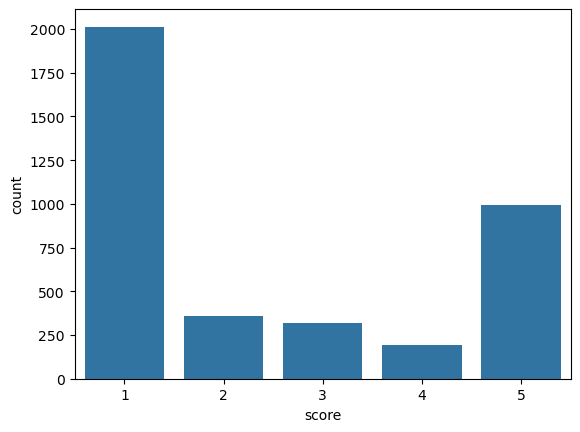

In [19]:
sns.countplot(data=data, x='score') # To show score distribution

- Distribusi score/ rating pada data terlihat sangat jomplang atau ekstrim atar score.
- Dimana score 1 paling dominan diantara yang lain, artinya ini cukup memberikan insight bahwa memang ulasan user cenderung buruk/ tidak puas.
- Namun score 5 juga lumayan banyak, walaupun tidak menyamai score 1, tapi ini sudah cukup membuktikan bahwa di satu sisi banyak juga pengguna yang merasa puas dengan aplikasi gopay.
- Sisanya jumlah socre 2,3 & 4 sangat sedikit, artinya sedikit pengguna yang merasakan biasa saja dengan aplikasi.
- Dari hasil tersebut dapat diketahui bahwa kepuasan pengguna sangat ekstrem dimana ada kepuasaan pengguna yang cenderung buruk dan ada juga yang cenderung bagus.

## Major Version

<Axes: xlabel='majorVersion', ylabel='count'>

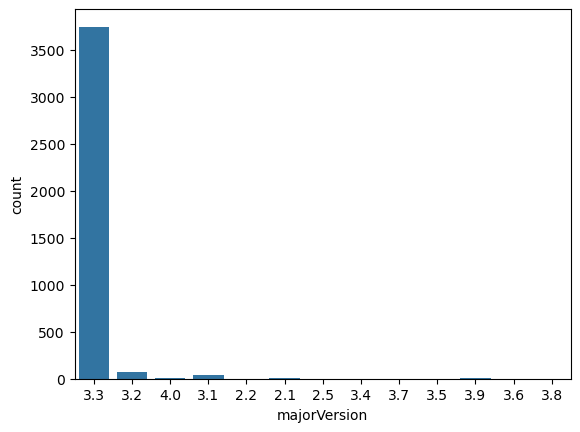

In [20]:
sns.countplot(data=data, x='majorVersion') # To show major version app distribution

- Kita ketahui bahwa distribusi versi aplikasi gopay setiap versinya sangat berbeda dimana versi yang digunakan oleh sebagian besar pengguna adalah 3.3.
- Selain versi 3.3 jumlahnya sangat sedikit artinya versi tersebut jarang sekali digunakan oleh pengguna antara bulan 6, 7 & 8 tahun 2025.

## Score VS Thumbs Up Count

<Axes: xlabel='score', ylabel='thumbsUpCount'>

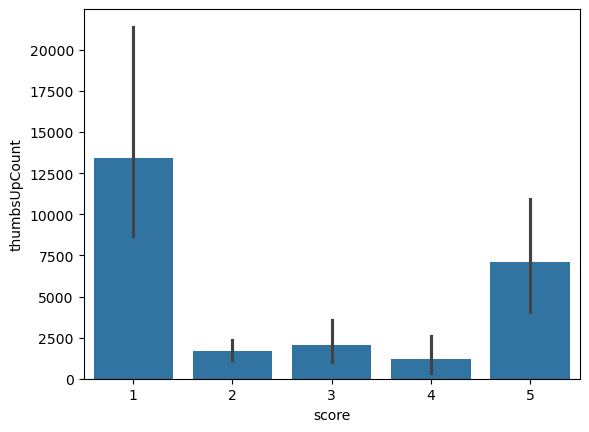

In [21]:
# To show distribution thumbs up count per score.
sns.barplot(data=data, x='score', y='thumbsUpCount', estimator="sum")

- Ternyata distribusi like per masing-masing score sangat berbeda jauh.
- Score 1 memiliki jumlah like yang sangat banyak diatar score yang lainnya, artinya issue buruk atau ketidakpuasan memiliki perhatian & dukungan yang sangat besar oleh pengguna.
- Namun score 5 juga memiliki like yang banyak, artinya banyak pengguna juga merasakan puas terhadap aplikasi Tokopedia.
- Seperti sebelumnya jumlah like score 2,3 & 4 relative sedikit.

## Major Version VS Score

<Axes: xlabel='majorVersion', ylabel='score'>

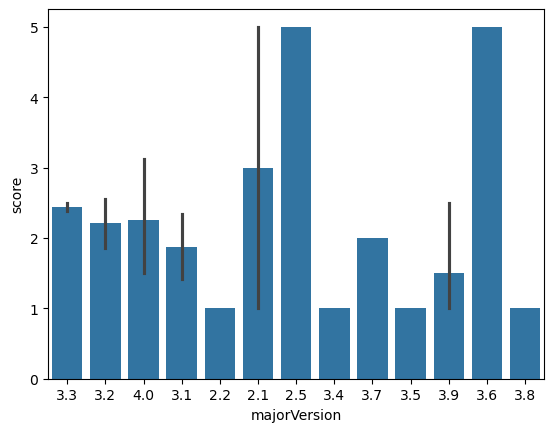

In [22]:
# To show mean score per category major version
sns.barplot(data=data, x='majorVersion', y='score')

Versi aplikasi 3.3 dengan jumlah terbanyak malah memiliki rata-rata score yang sangat rendah, artinya sebagian pesar user mempunyai ulasan yang buruk.

---

# 🤬 Sentiment Analysis

In [23]:
def sentiment(score):
    if score in [1,2,3]:
        return "NEGATIVE"
    else:
        return "POSITIVE"

In [24]:
data['labels'] = data["score"].progress_apply(sentiment) # Save sentiment labels in labels feature on data dataframe
data.head()

100% 3874/3874 [00:00<00:00, 3322849.43it/s]


,content,score,thumbsUpCount,month,minorVersion,majorVersion,labels
0,Tolong ditindak dan bila perlu dibanned tutup ...,2,9,8,3.327.0,3.3,NEGATIVE
1,Tokopedia cuma pas awal pesan barang aja yg on...,1,15,8,3.327.0,3.3,NEGATIVE
2,"Udah hampir bagus sih, tapi ada masalah dari e...",2,0,8,3.326.0,3.3,NEGATIVE
3,"banyak penipunya, uang pembayaran saya tertaha...",1,53,8,3.326.0,3.3,NEGATIVE
4,saya sarankan tidak usah pakai tokped. aplikas...,1,20,8,3.327.0,3.3,NEGATIVE


## EDA Sentiment Labels

### Sentiment Distribution

<Axes: xlabel='labels', ylabel='count'>

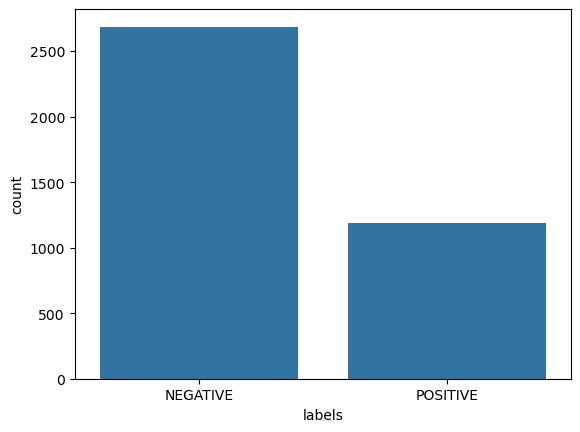

In [25]:
# To show sentiment labels distributions
sns.countplot(data=data, x='labels')

Seperti yang diketahu sebelumnya bahwa score paling dominan adalah 1 dan ini menunjukan bahwa memang sebagian besar ulasan pengguna pada aplikasi Tokopedia bersentimen negative.

### Sentiment VS Thumbs Up Count

<Axes: xlabel='labels', ylabel='thumbsUpCount'>

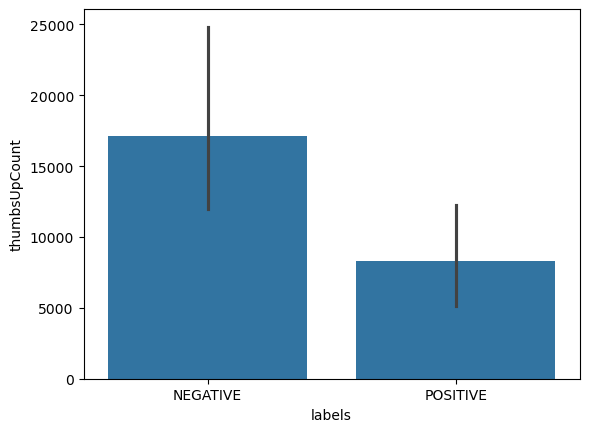

In [26]:
# To see count total of thumbs up count per labels
sns.barplot(data=data, x="labels", y="thumbsUpCount", estimator="sum")

Selain itu jumlah like pada sentiment negative lebih besar dari sentiment positive, ini artinya banyak pengguna yang memberikan perhatian atau dukungan terhadap issue-issue negative yang mungkin related dengan yang mereka rasakan.

### Sentiment VS Month

<Axes: xlabel='month', ylabel='count'>

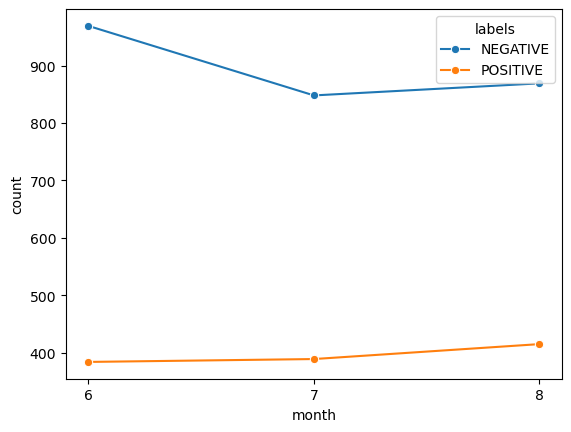

In [27]:
# To show labels distributions per month in 2025
plot_data = data.groupby(["month", "labels"]).size().reset_index(name="count")

sns.lineplot(data=plot_data, x="month", y="count", hue="labels", marker="o")

Dari bulan 6 sampai 8 menunjukan bahwa ulasan pengguna konsisten pada sentiment negative

### Sentiment VS Major Version

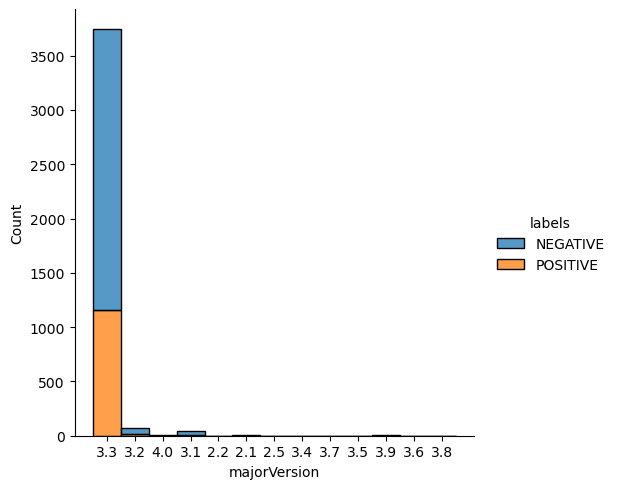

In [28]:
# To see count total of major version per labels
sns.displot(data=data, x="majorVersion", hue='labels', multiple='stack')

Dimana versi 3.3 sebagai versi mayoritas yang digunakan oleh user memiliki sentiment negative yang sangat tinggi, artinya pada versi 3.3 memiliki banyak issue negative yang harus segera diselesaikan.

---

# 📜 Text Preprocessing

In [29]:
# Collect and filtering data from content feature and make it a new dataframe
docs = pd.DataFrame(data['content'].reset_index(drop=True), columns=['content'])

### Document Translated Model

In [30]:
translator = pipeline(
    "translation", #pipeline model type
    model="facebook/nllb-200-distilled-600M", # name of model for translation
    src_lang="ind_Latn", # id/ code first language
    tgt_lang="eng_Latn" # id/ code output language
)

config.json:   0%|          | 0.00/846 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.46G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.46G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/564 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/4.85M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.3M [00:00<?, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


In [31]:
# Function for translation teks in docs
def translate(text):
  return translator(text)[0]["translation_text"]

In [34]:
# Apply function translation in data content feature
docs['text_translate'] = docs['content'].progress_apply(translate)

 50% 1942/3874 [08:00<04:00,  8.04it/s]Your input_length: 226 is bigger than 0.9 * max_length: 200. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)
 55% 2118/3874 [08:29<04:16,  6.86it/s]Your input_length: 215 is bigger than 0.9 * max_length: 200. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)
 60% 2328/3874 [09:02<02:44,  9.39it/s]Your input_length: 181 is bigger than 0.9 * max_length: 200. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)
 89% 3449/3874 [11:14<00:31, 13.41it/s]Your input_length: 232 is bigger than 0.9 * max_length: 200. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)
100% 3874/3874 [11:56<00:00,  5.41it/s]


### Documen/ Text Cleanning

In [35]:
# Download NLTK resources if not already available
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

# 1. Remove numbers, symbols, emojis, links, mentions, etc.
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)       # remove mentions
    text = re.sub(r'#[A-Za-z0-9_]+', '', text)       # remove hashtags
    text = re.sub(r'RT[\s]+', '', text)              # remove retweets "RT"
    text = re.sub(r"http\S+", '', text)              # remove URLs
    text = re.sub(r'[0-9]+', '', text)               # remove numbers
    text = re.sub(r'[^\w\s]', '', text)              # remove symbols/emoji
    text = text.replace('\n', ' ')                   # remove newlines
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    text = text.strip()
    return text

# 2. Lowercasing
def casefoldingText(text):
    return text.lower()

# 3. Tokenization
def tokenizing(text):
    return word_tokenize(text)

# 4. Remove stopwords
def stopwordstext(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return filtered_tokens

# 5. Lemmatization
def lemmatizing(tokens):
    lemmatizer = WordNetLemmatizer()
    processed_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(processed_tokens)

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [36]:
# Apply all function of text preprocessing
docs['text_clean'] = docs['text_translate'].progress_apply(cleaningText)
docs['text_lower'] = docs['text_clean'].progress_apply(casefoldingText)
docs['text_tokenizing'] = docs['text_lower'].progress_apply(tokenizing)
docs['text_stopwords'] = docs['text_tokenizing'].progress_apply(stopwordstext)
docs['text_akhir'] = docs['text_stopwords'].progress_apply(lemmatizing)

100% 3874/3874 [00:00<00:00, 155179.91it/s]
100% 3874/3874 [00:00<00:00, 2649394.05it/s]
100% 3874/3874 [00:00<00:00, 29902.42it/s]
100% 3874/3874 [00:00<00:00, 29942.09it/s]
100% 3874/3874 [00:01<00:00, 2542.92it/s]


In [37]:
docs.head()

,content,text_translate,text_clean,text_lower,text_tokenizing,text_stopwords,text_akhir
0,Tolong ditindak dan bila perlu dibanned tutup ...,Please act and if necessary permanently shut d...,Please act and if necessary permanently shut d...,please act and if necessary permanently shut d...,"[please, act, and, if, necessary, permanently,...","[please, act, necessary, permanently, shut, se...",please act necessary permanently shut seller u...
1,Tokopedia cuma pas awal pesan barang aja yg on...,"It's just that at the beginning of the order, ...",Its just that at the beginning of the order th...,its just that at the beginning of the order th...,"[its, just, that, at, the, beginning, of, the,...","[beginning, order, fare, cheap, second, time, ...",beginning order fare cheap second time fare hi...
2,"Udah hampir bagus sih, tapi ada masalah dari e...","It's almost fine, but there's a problem with t...",Its almost fine but theres a problem with the ...,its almost fine but theres a problem with the ...,"[its, almost, fine, but, theres, a, problem, w...","[almost, fine, theres, problem, expedition, st...",almost fine there problem expedition still wor...
3,"banyak penipunya, uang pembayaran saya tertaha...","Many of the scammers, my payment money is stuc...",Many of the scammers my payment money is stuck...,many of the scammers my payment money is stuck...,"[many, of, the, scammers, my, payment, money, ...","[many, scammers, payment, money, stuck, tokped...",many scammer payment money stuck tokped report...
4,saya sarankan tidak usah pakai tokped. aplikas...,I suggest you don't use a topped-up app. It's ...,I suggest you dont use a toppedup app Its a re...,i suggest you dont use a toppedup app its a re...,"[i, suggest, you, dont, use, a, toppedup, app,...","[suggest, dont, use, toppedup, app, really, ba...",suggest dont use toppedup app really bad app d...


In [38]:
docs = docs["text_akhir"].reset_index(drop=True)
data = data.reset_index(drop=True)

docs = pd.concat([data,docs], axis=1)
docs.head()

,content,score,thumbsUpCount,month,minorVersion,majorVersion,labels,text_akhir
0,Tolong ditindak dan bila perlu dibanned tutup ...,2,9,8,3.327.0,3.3,NEGATIVE,please act necessary permanently shut seller u...
1,Tokopedia cuma pas awal pesan barang aja yg on...,1,15,8,3.327.0,3.3,NEGATIVE,beginning order fare cheap second time fare hi...
2,"Udah hampir bagus sih, tapi ada masalah dari e...",2,0,8,3.326.0,3.3,NEGATIVE,almost fine there problem expedition still wor...
3,"banyak penipunya, uang pembayaran saya tertaha...",1,53,8,3.326.0,3.3,NEGATIVE,many scammer payment money stuck tokped report...
4,saya sarankan tidak usah pakai tokped. aplikas...,1,20,8,3.327.0,3.3,NEGATIVE,suggest dont use toppedup app really bad app d...


---

# 💭 Topic Modeling

## Data/ Document Splitting

In [39]:
# Splitting data into two different dataframe such as negative & positive
negative = docs[docs['labels']=='NEGATIVE']['text_akhir']
positive = docs[docs['labels']=='POSITIVE']['text_akhir']

## Topic Modeling Model

In [40]:
# Load embedding model: converts text into semantic vectors
embedding_model = pipeline(
    "feature-extraction",
    model="princeton-nlp/sup-simcse-roberta-large"
)
# "sup-simcse-roberta-large" is a RoBERTa-based model fine-tuned for semantic similarity

# Dimensionality reduction model (UMAP)
umap_model = UMAP(
    n_neighbors=15, # consider 15 nearest neighbors to preserve local structure
    n_components=5, # reduce embeddings to 5 dimensions
    min_dist=0.0, # allows points to be packed more closely
    metric='cosine', # measure distance based on cosine similarity
    random_state=42
)

# Vectorizer: converts text into token counts
vectorizer_model = CountVectorizer(
    min_df=10, # only keep words/phrases that appear at least 10 times
    stop_words="english"
)

# Class-based TF-IDF transformer
ctfidf_model = ClassTfidfTransformer(bm25_weighting=True)
# - Uses BM25 weighting for more accurate class-based keyword extraction

# Keyword representation model using Maximal Marginal Relevance (MMR)
representation_model = MaximalMarginalRelevance(diversity=0.3)
# - diversity=0.3: balance between relevance and diversity of selected keywords

def topic(n_cluster):
    # Function to create a BERTopic model with a fixed number of clusters
    topic_model = BERTopic(
        embedding_model=embedding_model,           # text embeddings
        umap_model=umap_model,                     # dimensionality reduction
        hdbscan_model=KMeans(n_clusters=n_cluster),
        # use Agglomerative Clustering instead of default HDBSCAN
        # number of clusters defined by n_cluster

        vectorizer_model=vectorizer_model,         # text to tokens
        ctfidf_model=ctfidf_model,                 # topic representation with C-TF-IDF
        representation_model=representation_model, # keyword extraction with MMR
        calculate_probabilities=True,              # compute topic probabilities per document
        verbose=True                               # show training logs
    )
    return topic_model

config.json:   0%|          | 0.00/664 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cuda:0


## Negative Topic

### Topic Modelling

In [43]:
negative_topic = topic(25) # Output 25 topics
negative_info = negative_topic.fit_transform(negative)
negative_info = negative_topic.get_topic_info()
negative_info.to_excel('tokped_negative.xlsx')
negative_info

2025-09-02 05:49:47,185 - BERTopic - Embedding - Transforming documents to embeddings.
100% 2686/2686 [00:13<00:00, 195.79it/s]
2025-09-02 05:50:00,908 - BERTopic - Embedding - Completed ✓
2025-09-02 05:50:00,909 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-09-02 05:50:06,896 - BERTopic - Dimensionality - Completed ✓
2025-09-02 05:50:06,897 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-09-02 05:50:06,903 - BERTopic - Cluster - Completed ✓
2025-09-02 05:50:06,904 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-09-02 05:50:10,402 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,0,183,0_courier_package_shipping_delivery,"[courier, package, shipping, delivery, service...",[time go junk dont get order courier im past e...
1,1,170,1_order_cancel_refund_store,"[order, cancel, refund, store, delivery, respo...",[cancellation doesnt automatically go money ca...
2,2,167,2_buyer_refund_customer_complaint,"[buyer, refund, customer, complaint, order, re...",[complaint good according tgl july check recei...
3,3,150,3_app_free_apps_phone,"[app, free, apps, phone, fix, worse, error, ap...",[update bug app open signalnetwork go go suppo...
4,4,146,4_discount_voucher_price_checkout,"[discount, voucher, price, checkout, buy, char...",[there discount voucher buy thing cant darling...
5,5,146,5_chat_complaint_customer_solution,"[chat, complaint, customer, solution, service,...",[old order delivery process chat live agent cu...
6,6,137,6_long_package_delivery_week,"[long, package, delivery, week, slow, shipping...",[ive waiting long time happen long time since ...
7,7,129,7_sale_shop_store_garbage,"[sale, shop, store, garbage, shopping, buyer, ...",[difficult sell use embellished embellishment ...
8,8,121,8_phone_app_deleted_dont,"[phone, app, deleted, dont, account, apps, any...",[cant change phone number active bug cant use ...
9,9,117,9_search_product_feature_apk,"[search, product, feature, apk, difficult, wan...",[please correct search type name product alway...


### Sub Topic Intepretation

In [46]:
negative_topic.set_topic_labels({
    0: "Courier service delay and issues.", 1: "Cancellation/refund process is problematic.", 
    2: "Unreturned funds after product return.", 3: "App open signal network bug", 
    4: "Issues with discount vouchers", 5: "Unresponsive/unprofessional customer service.", 
    6: "Problem not solved, long waiting time.", 7: "Difficult to make sales.", 
    8: "Can't change phone number/email.", 9: "Product search feature not working.", 
    10: "Old, dead-end, and unclear answers.", 11: "Lack of knowledge/uncertainty of data", 
    12: "Tokopedia-TikTok merger negatively impacts sellers.", 13: "Gopay balance transfer/payment error.", 
    14: "Tokopedia UI/UX degraded post-TikTok acquisition.", 15: "Frequent errors, bugs, and disconnections.", 
    16: "Missing transaction history.", 17: "Scammers and difficult return policy.", 
    18: "Tokopedia complaint: no response/action.", 19: "Account deactivation and reuse issues.", 
    20: "Tokopedia e-wallet balance theft.", 21: "Problem: expensive, store, and handout.", 
    22: "Bad expedition service, garbage cooperative.", 23: "Product recommendation and accessibility issues.", 
    24: "Free rent promotion not received."
})

negative_info = negative_topic.get_document_info(negative)
negative_info["Sub Topic"] = negative_info["CustomName"]
negative_info = negative_info[["Document","Topic", "Sub Topic"]]
negative_info.head()

,Document,Topic,Sub Topic
0,please act necessary permanently shut seller u...,2,Unreturned funds after product return.
1,beginning order fare cheap second time fare hi...,0,Courier service delay and issues.
2,almost fine there problem expedition still wor...,0,Courier service delay and issues.
3,many scammer payment money stuck tokped report...,20,Tokopedia e-wallet balance theft.
4,suggest dont use toppedup app really bad app d...,8,Can't change phone number/email.


### Topic Sanitizing/ Clusterring

In [47]:
def get_topic_group(topic_number):
    if topic_number in [0, 22]:
        return "Delivery & Courier Issues"
    elif topic_number in [1, 2, 17]:
        return "Cancellation, Refund & Return Problems"
    elif topic_number in [3, 9, 15]:
        return "App & Technical Issues"
    elif topic_number in [[4, 21, 24]]:
        return "Promotions & Pricing Issues"
    elif topic_number in [8, 13, 16, 19, 20]:
        return "Account, Security & E-Wallet Issues"
    else:
        return "Customer Service & Merger Impact"

negative_info["Main Topic"] = negative_info["Topic"].progress_apply(get_topic_group)
negative_info = negative_info[["Document","Main Topic", "Sub Topic"]]

negative = data[data['labels']=='NEGATIVE'][["thumbsUpCount","month", "minorVersion","majorVersion"]]
negative_info = pd.concat([negative_info.reset_index(drop=True), negative.reset_index(drop=True)], axis=1)
negative_info

100% 2686/2686 [00:00<00:00, 2559850.16it/s]


,Document,Main Topic,Sub Topic,thumbsUpCount,month,minorVersion,majorVersion
0,please act necessary permanently shut seller u...,"Cancellation, Refund & Return Problems",Unreturned funds after product return.,9,8,3.327.0,3.3
1,beginning order fare cheap second time fare hi...,Delivery & Courier Issues,Courier service delay and issues.,15,8,3.327.0,3.3
2,almost fine there problem expedition still wor...,Delivery & Courier Issues,Courier service delay and issues.,0,8,3.326.0,3.3
3,many scammer payment money stuck tokped report...,"Account, Security & E-Wallet Issues",Tokopedia e-wallet balance theft.,53,8,3.326.0,3.3
4,suggest dont use toppedup app really bad app d...,"Account, Security & E-Wallet Issues",Can't change phone number/email.,20,8,3.327.0,3.3
...,...,...,...,...,...,...,...
2681,tokopedia hr sprite store send old stock publi...,Customer Service & Merger Impact,Tokopedia-TikTok merger negatively impacts sel...,0,6,3.318.0,3.3
2682,tokopedia care good,Customer Service & Merger Impact,Tokopedia-TikTok merger negatively impacts sel...,1,8,3.324.0,3.3
2683,since merger tiktoks application become heavy,Customer Service & Merger Impact,"Old, dead-end, and unclear answers.",0,7,3.322.0,3.3
2684,freezer discounted freezer complicated paylater,"Account, Security & E-Wallet Issues",Gopay balance transfer/payment error.,0,8,3.326.0,3.3


### EDA (Topic)

#### Main Topic

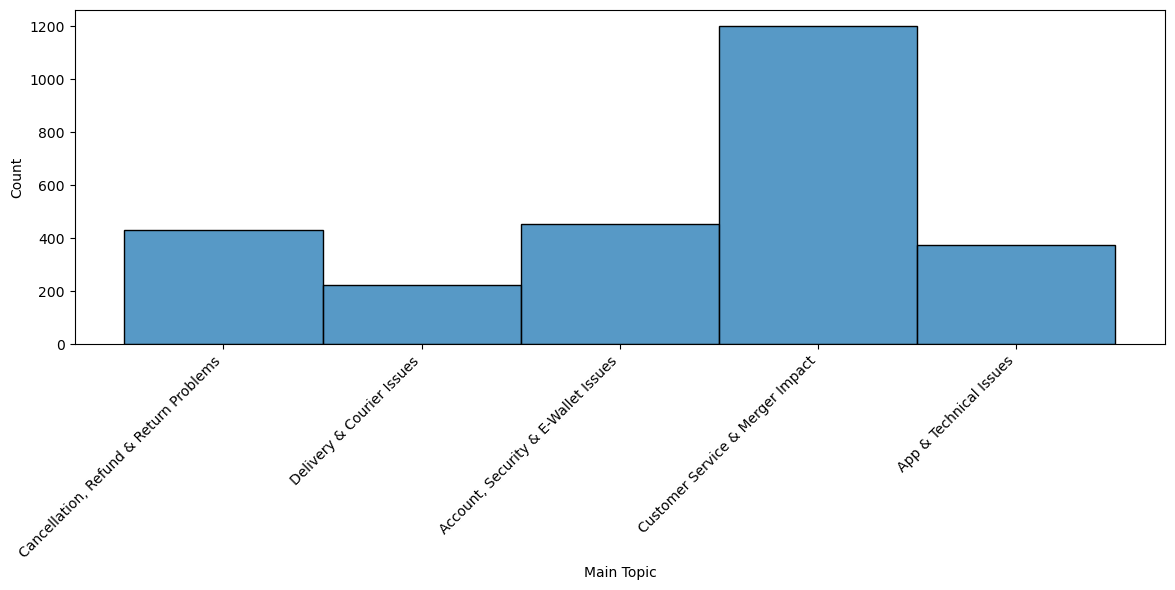

In [48]:

plt.figure(figsize=(12, 6))
sns.histplot(data=negative_info, x="Main Topic")

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#### Main Topic VS Thumb Up Count

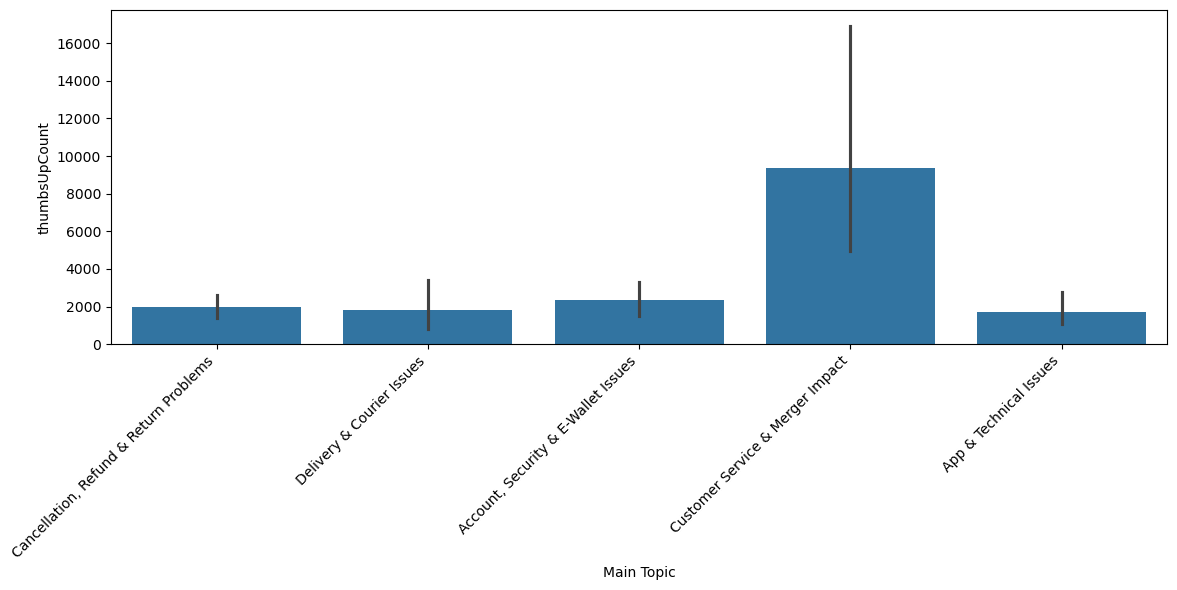

In [49]:
plt.figure(figsize=(12, 6))
sns.barplot(data=negative_info, x="Main Topic", y="thumbsUpCount", estimator='sum')

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#### Main Topic VS Major Version

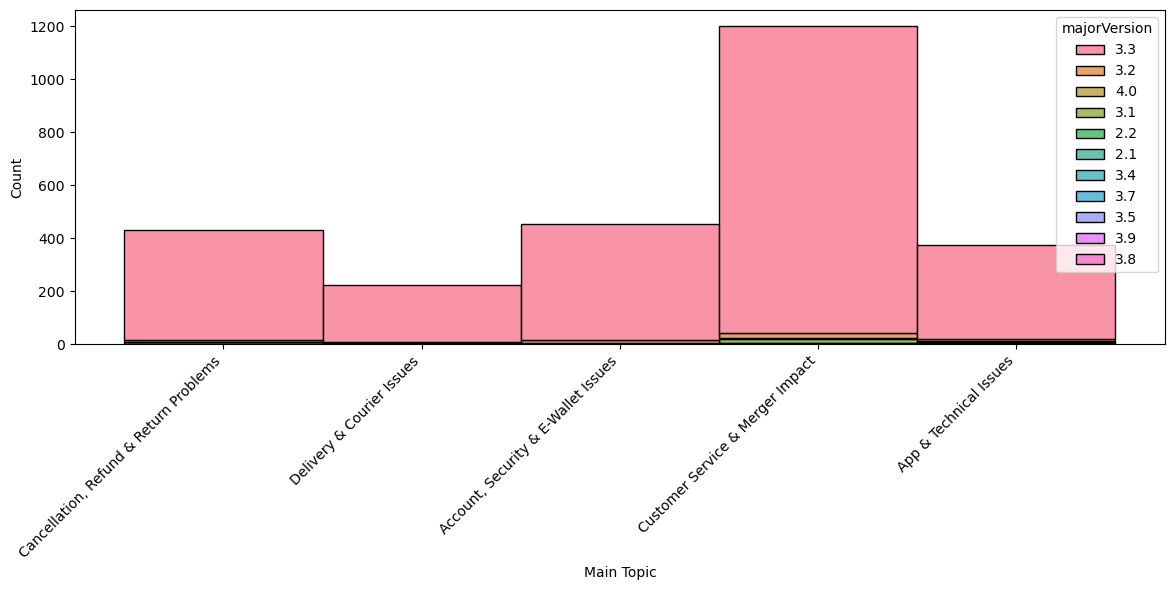

In [50]:
plt.figure(figsize=(12, 6))
sns.histplot(data=negative_info, x="Main Topic", hue="majorVersion", multiple="stack")

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#### Main Topic VS Month

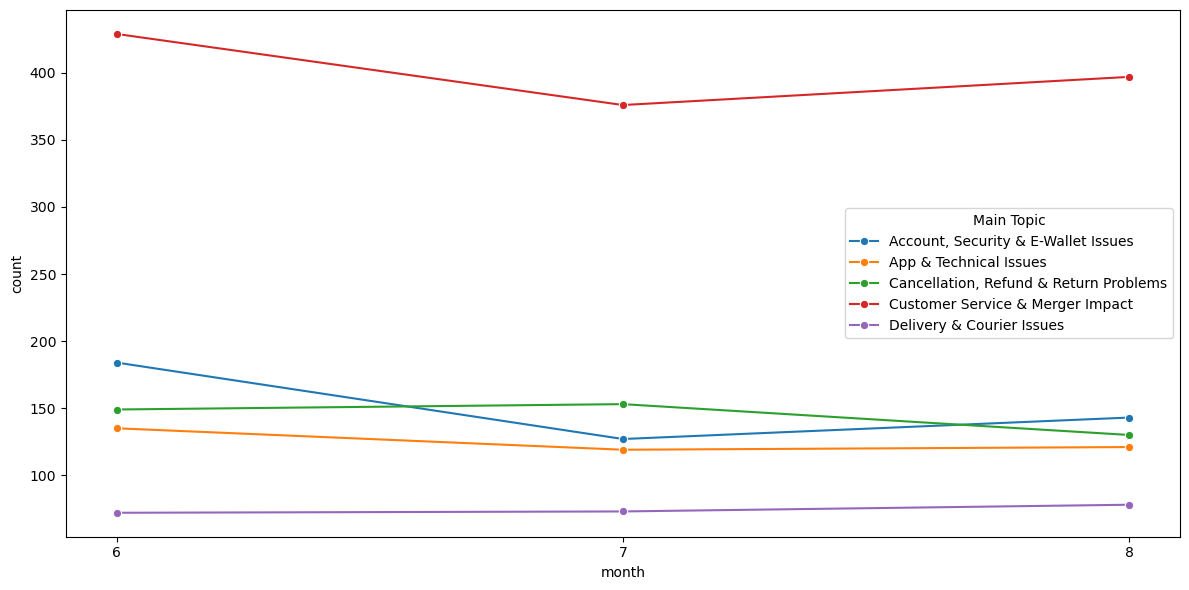

In [54]:
plt.figure(figsize=(12, 6))
plot_data = negative_info.groupby(["month", "Main Topic"]).size().reset_index(name="count")

sns.lineplot(data=plot_data, x="month", y="count", hue="Main Topic", marker="o")
plt.tight_layout()
plt.show()

## Positive Topic

### Topic Modelling

In [58]:
positive_topic = topic(11)
positive_info = positive_topic.fit_transform(positive)
positive_info = positive_topic.get_topic_info()
positive_info.to_excel('tokped_positive.xlsx')
positive_info

2025-09-02 06:45:37,895 - BERTopic - Embedding - Transforming documents to embeddings.
100% 1188/1188 [00:05<00:00, 205.38it/s]
2025-09-02 06:45:43,682 - BERTopic - Embedding - Completed ✓
2025-09-02 06:45:43,683 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-09-02 06:45:45,302 - BERTopic - Dimensionality - Completed ✓
2025-09-02 06:45:45,303 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-09-02 06:45:45,306 - BERTopic - Cluster - Completed ✓
2025-09-02 06:45:45,307 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-09-02 06:45:46,821 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,0,196,0_stuff_product_nice_make,"[stuff, product, nice, make, thats, okay, time...","[im happy tokopedia good luck tokopedia, im sa..."
1,1,152,1_thats_time_make_product,"[thats, time, make, product, im, stuff, thing,...",[actually ive subscribing long time usually go...
2,2,117,2_thing_product_nice_thats,"[thing, product, nice, thats, im, make, stuff,...",[first impression using app quite confusing fr...
3,3,110,3_make_thats_product_thing,"[make, thats, product, thing, okay, stuff, nic...","[apk easy use good, apps good helpful, really ..."
4,4,108,4_thing_make_product_time,"[thing, make, product, time, okay, stuff, that...",[far good fast delivery good according ad tikt...
5,5,103,5_nice_stuff_thats_make,"[nice, stuff, thats, make, thing, product, im,...","[good rarely love free dowry, completed suitab..."
6,6,102,6_nice_thing_stuff_product,"[nice, thing, stuff, product, make, thats, oka...",[steady shopping price good quality appropriat...
7,7,87,7_okay_thats_nice_thing,"[okay, thats, nice, thing, product, time, im, ...","[good helpful, good helpful enough, please kee..."
8,8,74,8_stuff_product_thats_thing,"[stuff, product, thats, thing, nice, im, make,...","[good star prove, apk good, thought place pret..."
9,9,72,9_thing_product_make_thats,"[thing, product, make, thats, okay, nice, stuf...","[easy access preferably type product, always n..."


### Sub Topic Intepretation

In [59]:
positive_topic.set_topic_labels({
    0: "Satisfied with good online shopping.", 1: "Good app functionality and refunds.", 
    2: "Good products and fast delivery.", 3: "Apps easy use, helpful, good.",
    4: "Fast, reliable, and convenient service.", 5: "Good value and competitive pricing.", 
    6: "Competitive price, good quality shopping.", 7: "Good, helpful, and satisfactory experience.",
    8: "Good quality and performance", 9: "Easy access and product discovery.",
    10: "Good, quick, responsive service."

})

positive_info = positive_topic.get_document_info(positive)
positive_info["Main Topic"] = positive_info["CustomName"]
positive_info = positive_info[["Document", "Main Topic"]]
positive_info

,Document,Main Topic
0,tokopedia getting weirder there store thats ar...,Satisfied with good online shopping.
1,price good already price placed good also pric...,Good products and fast delivery.
2,please dont make app lot mistake hide keywords...,Good app functionality and refunds.
3,unfortunately store dont provide jne courier i...,Good products and fast delivery.
4,advice expedition fastest tokopedia repair don...,Good products and fast delivery.
...,...,...
1183,amazing pedia shop,Satisfied with good online shopping.
1184,good star prove,Good quality and performance
1185,good help,"Good, helpful, and satisfactory experience."
1186,process fast,"Good, quick, responsive service."


### Main Topic Distribution

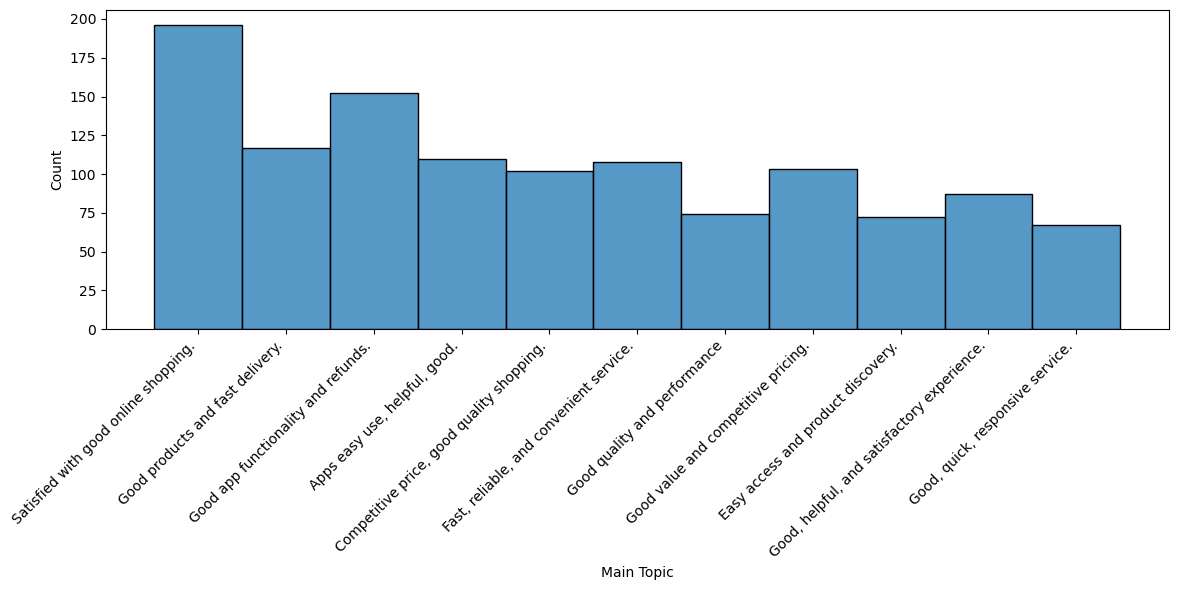

In [60]:
plt.figure(figsize=(12, 6))
sns.histplot(data=positive_info, x="Main Topic")

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

---

# 🎯 Conclusion